## Experimento 2

### Objetivo
Nos interesa ahora analizar la calidad de los resultados variando el tamaño del dataset, utilizando kNN + PCA
utilizando las combinaciones de parámetros que en el experimento 1 fueron las más exitosas.

Combinaciones:
* k= 3, alpha = 40

### Experimento

Vamos a variar el tamaño de las muestras desde 100 imágenes hasta la totalidad. Veremos como impacta esto en nuestro modelo, además tomaremos medidas de tiempos.

Queremos ver qué sucede en el rango de 100 a la totalidad de imágenes, pero vamos a hacer zoom en los primeros mil.

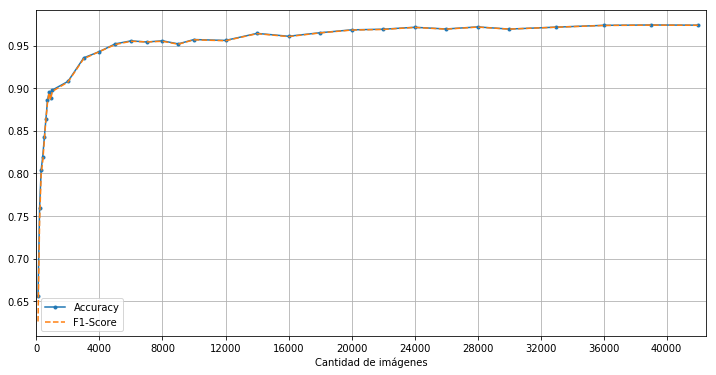

In [26]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def train_sizes():
    rango_1000 = range(100, 1000, 100)
    rango_10000 = range(1000, 10000, 1000)
    rango_30000 = range(10000, 30000, 2000)
    rango_41990 = range(30000, 41990, 3000)
    rango = list(rango_1000) + list(rango_10000) + list(rango_30000) + list(rango_41990)
    rango.append(41990)
    return rango

def load_results(fname):
    arr = np.load(fname)
    acc = list(map(lambda x: x['acc'], arr))
    f1 = list(map(lambda x: x['f1'], arr))
    times = list(map(lambda x: x['times'][0], arr))
    return acc, f1, times

def plot_scores(acc, f1, x):
    fig, ax = plt.subplots(2, 1, figsize=(12,15))

    for i in [0,1]:
        ax[i].set_xlabel("Cantidad de imágenes")
        ax[i].grid()
        ax[i].set_xlim(0, 42500)
        ax[i].set_xticks(range(0, 42000, 4000));

    # Grafico de accuracy
    ax[0].plot(x, acc, ".-")
    ax[0].set_ylabel("Accuracy")

    # Grafico de F1
    ax[1].plot(x, f1, ".-")
    ax[1].set_ylabel("F1-Score")
    
def plot_scores2(acc, f1, x):
    plt.figure(figsize=(12,6))

    plt.xlabel("Cantidad de imágenes")
    plt.grid()
    plt.xlim(0, 42500)
    plt.xticks(range(0, 42000, 4000))

    plt.plot(x, acc, ".-", x, f1, "--")
    plt.legend(['Accuracy', 'F1-Score'])


# Carga de resultados
acc, f1, times = load_results("exp2_k3_alpha40.npy")
x = train_sizes()

# Graficar scores
plot_scores2(acc, f1, x)

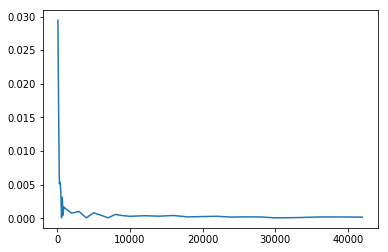

In [15]:
plt.plot(x, abs(np.array(acc) - np.array(f1)))

In [ ]:
# Gráficos de tiempos
fig, ax = plt.subplots(3, 1, figsize=(12,15))
for i in [0,1,2]:
    ax[i].set_xlabel("Cantidad de imágenes")
    ax[i].grid()
    ax[i].set_xlim(0, 42500)
    ax[i].set_xticks(range(0, 42000, 4000));

times_x = []
times_xlogx = []
for i in range(0, len(x)):
    times_x.append(times[i] / x[i])
    times_xlogx.append(times[i] / (log(x[i])*x[i]))

# Tiempos crudos
ax[0].plot(x, times, ".-")
ax[0].set_ylabel("Tiempo en segundos")

# Tiempos / X
ax[1].plot(x, times_x, ".-")
ax[1].set_ylabel("Tiempo en segundos, dividido por x.")

# Tiempos / (X log X)
ax[2].plot(x, times_xlogx, ".-")
ax[2].set_ylabel("Tiempo en segundos, dividido por x*log(x).")

### Faltaría

Falta tomar otras combinaciones de k, alpha, si es posible basandonos en resultados del exp1. En particular sería interesante ver si alguna combinación que ande bien cuando hay pocas imágenes para entrenarse, a ver si anda mejor que los que andan bien con muchas imagenes.

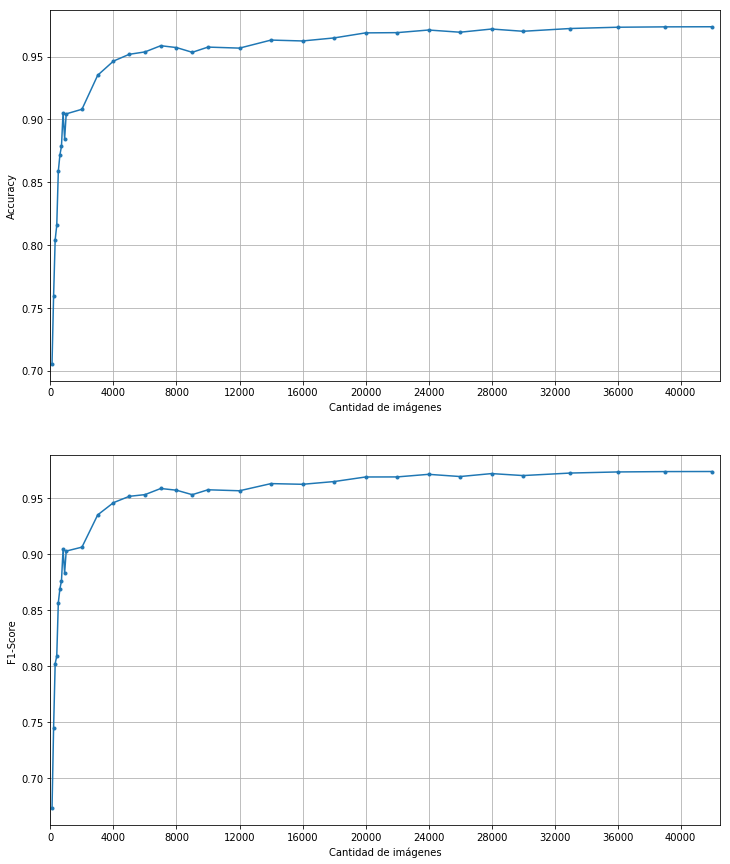

In [91]:
# Carga de resultados
# k = 3, alpha = 36
acc, f1, times = load_results("exp2_k3_alpha36.npy")
x = train_sizes()
plot_scores(acc, f1, x)

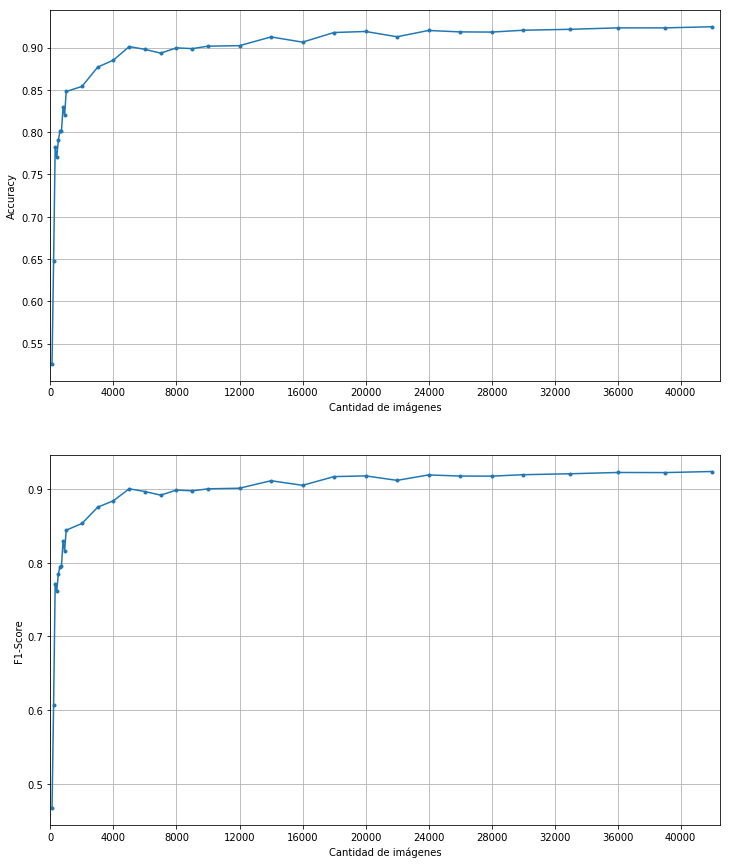

In [92]:
# k=10, alpha=10
acc, f1, times = load_results("exp2_k10_alpha10.npy")
x = train_sizes()
plot_scores(acc, f1, x)

[0.9769177533281117]


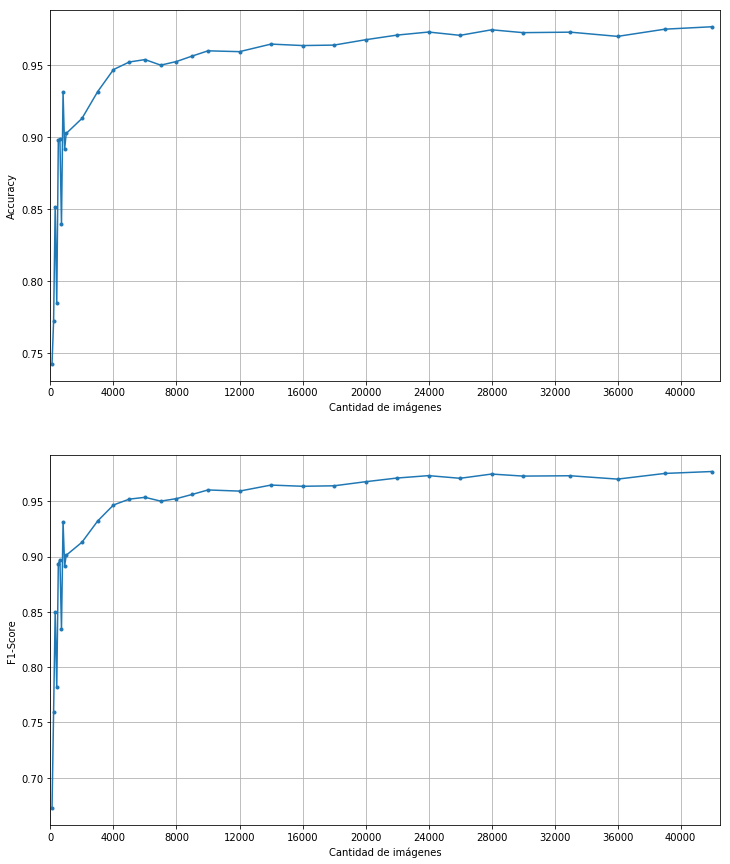

In [94]:
#k=3, alpha=40, K=10
acc, f1, times = load_results("exp2_k3_alpha40_K10.npy")
x = train_sizes()
print(acc[len(acc)-1])
plot_scores(acc, f1, x)

Graficar todos juntos

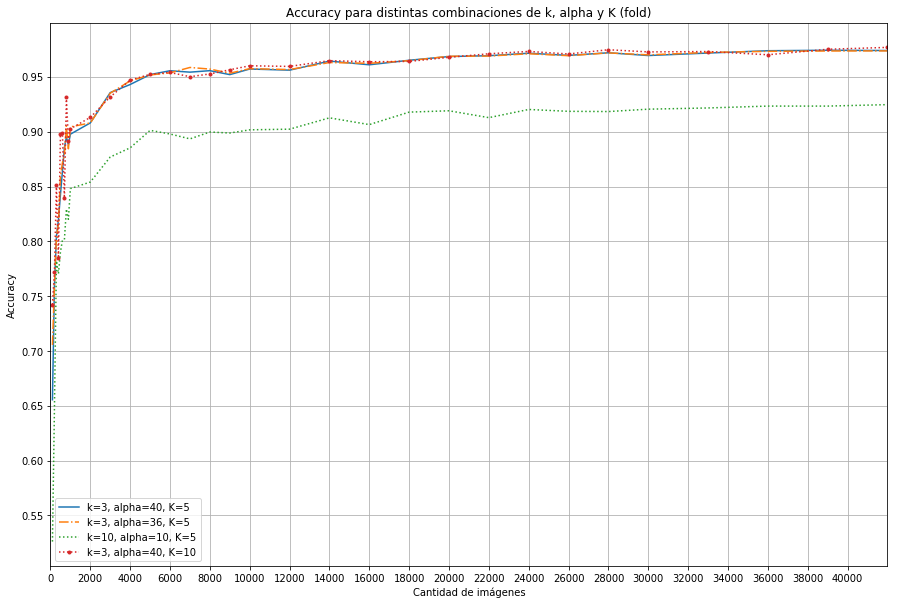

In [122]:
f, ax_acc = plt.subplots(1, 1, figsize=(15,10))

acc1, f1, times = load_results("exp2_k3_alpha40.npy")
acc2, f1, times = load_results("exp2_k3_alpha36.npy")
acc3, f1, times = load_results("exp2_k10_alpha10.npy")
acc4, f1, times = load_results("exp2_k3_alpha40_K10.npy")

accs = [acc1, acc2, acc3, acc4]

from itertools import chain, cycle
lines = ["-", "-.", ":", ":."]
linecycler = cycle(lines)

x = train_sizes()

ax_acc.set_title('Accuracy para distintas combinaciones de k, alpha y K (fold)')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_xlabel('Cantidad de imágenes')
ax_acc.set_xlim(1, 42000)
ax_acc.set_xticks(range(0, 42000, 2000))
ax_acc.set_yticks([i/100 for i in range(0, 100, 5)])
ax_acc.grid()

for acc in accs:
    ax_acc.plot(x, acc, next(linecycler))
ax_acc.legend(['k=3, alpha=40, K=5', 'k=3, alpha=36, K=5', 'k=10, alpha=10, K=5', 'k=3, alpha=40, K=10'])
